In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])

# Convert categorical data to numerical data
# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert Gender Strings to Numbers: Male to 1 and Female to 0
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

In [27]:
# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

In [28]:
# Linear Regression Model

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_test.shape, y_test.shape)

# Create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_trainPred = lr.predict(X_train)
y_testPred = lr.predict(X_test)

# Round the predictions to the nearest integer
y_trainPred = np.round(y_trainPred)
y_testPred = np.round(y_testPred)

(75, 2) (75,)


In [35]:
from sklearn.model_selection import cross_val_score

# Calculate Cross Validation Scores for 15 folds
# we use cross validation to get a better estimate of the model's performance
r2Train = cross_val_score(lr, X_train, y_train, cv=15, scoring='r2')
mseTrain = -1 * cross_val_score(lr, X_train, y_train, cv=15, scoring='neg_mean_squared_error')
r2Test = cross_val_score(lr, X_test, y_test, cv=15, scoring='r2')
mseTest = -1 * cross_val_score(lr, X_test, y_test, cv=15, scoring='neg_mean_squared_error')

print("Results for Linear Regression Model: \n")
print(f'Mean Squared Error Train: {mseTrain}\n')
print(f'R^2 Train: {r2Train}\n')

print(f'Average Mean Squared Error Train: {np.mean(mseTrain)}')
print(f'Average R^2 Train: {np.mean(r2Train)}\n')

print(f'Mean Squared Error Test: {mseTest}\n')
print(f'R^2 Test: {r2Test}\n')

print(f'Average Mean Squared Error Test: {np.mean(mseTest)}')
print(f'Average R^2 Test: {np.mean(r2Test)}')

Results for Linear Regression Model: 

Mean Squared Error Train: [0.36320511 0.25092829 0.64591507 0.68595341 0.731697   0.52184439
 0.48877131 0.88277543 0.91570423 0.85754598 0.45701947 0.71880336
 0.47552581 0.61161942 0.35861328]

R^2 Train: [0.88081867 0.93643362 0.77936291 0.78067037 0.6744396  0.76781117
 0.85995091 0.62071947 0.74895018 0.74703658 0.83010429 0.80293259
 0.78286493 0.80568088 0.84514426]

Average Mean Squared Error Train: 0.5977281049731364
Average R^2 Train: 0.7908613628260651

Mean Squared Error Test: [1.29807995 0.44473663 0.97142352 0.42314097 0.30259433 0.40275331
 0.51707457 1.16017129 1.8097533  0.70787939 0.24351678 0.05034095
 0.29989956 0.7349889  1.19452387]

R^2 Test: [ 0.29452177  0.8610198   0.80725724  0.68886694  0.91203653  0.92485946
  0.78455226  0.60805024 -6.54063874  0.73186387  0.88726075  0.97752636
  0.92023948  0.7812533  -3.97718278]

Average Mean Squared Error Test: 0.7040584873984371
Average R^2 Test: -0.0225675681268673


     Sleep Duration  Sleep Quality
52              6.0              6
59              7.7              7
361             8.2              9
182             7.8              8
4               5.9              4
..              ...            ...
9               7.8              7
283             6.0              6
237             6.5              7
265             5.9              6
12              6.1              6

[299 rows x 2 columns]


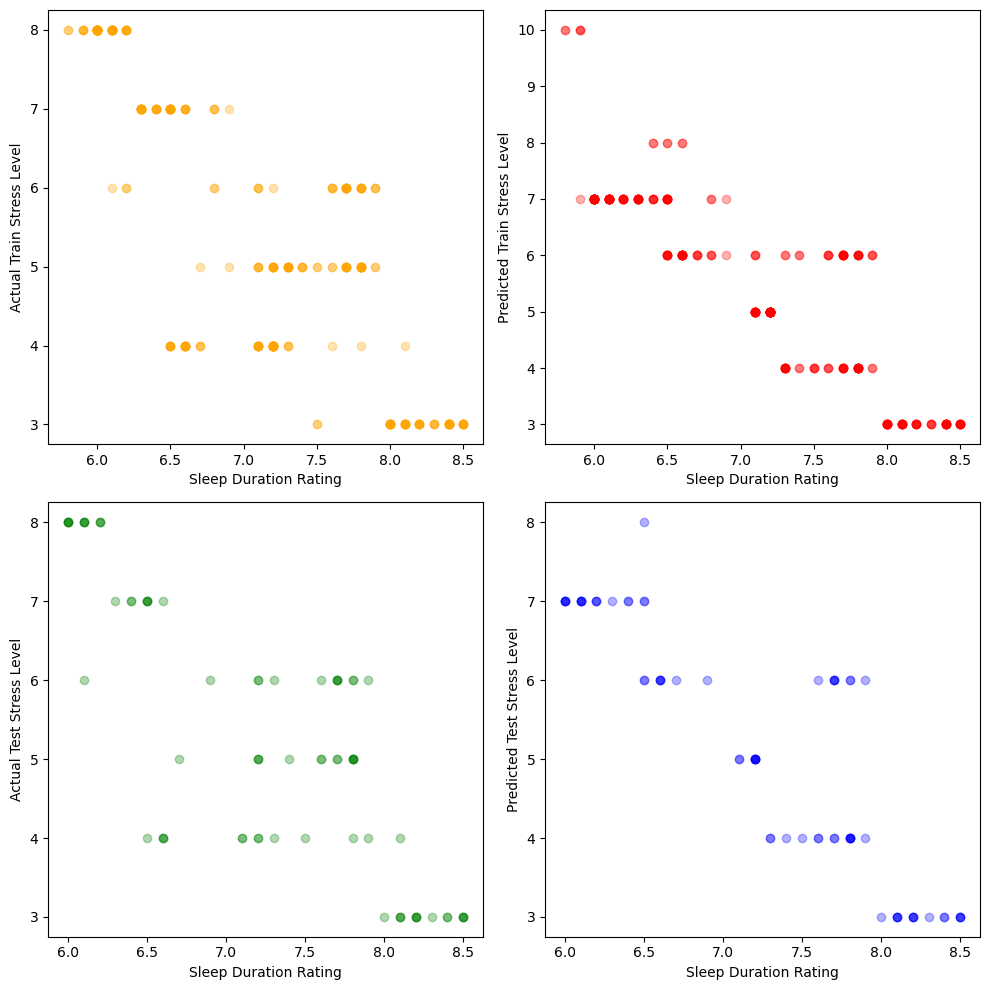

In [30]:
# Create scatterplots for train sleep duration & predicted train stress level

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

print(X_train)

# Plot Train Data vs Train Predictions
axes[0].scatter(x=X_train['Sleep Duration'], y=y_train, color='orange', alpha=0.3)
axes[0].set(xlabel='Sleep Duration Rating', ylabel='Actual Train Stress Level')
axes[1].scatter(x=X_train['Sleep Duration'], y=y_trainPred, color='red', alpha=0.3)
axes[1].set(xlabel='Sleep Duration Rating', ylabel='Predicted Train Stress Level')

# Plot Test Data vs Test Predictions
axes[2].scatter(x=X_test['Sleep Duration'], y=y_test, color='green', alpha=0.3)
axes[2].set(xlabel='Sleep Duration Rating', ylabel='Actual Test Stress Level')
axes[3].scatter(x=X_test['Sleep Duration'], y=y_testPred, color='blue', alpha=0.3)
axes[3].set(xlabel='Sleep Duration Rating', ylabel='Predicted Test Stress Level')
plt.tight_layout()
plt.show()

Multinomial Logistic Regression Training Classification Report: 
               precision    recall  f1-score   support

           3       0.96      0.96      0.96        54
           4       0.61      0.89      0.72        54
           5       0.84      0.57      0.68        54
           6       0.89      0.76      0.82        42
           7       1.00      0.84      0.91        38
           8       0.93      1.00      0.97        57

    accuracy                           0.84       299
   macro avg       0.87      0.84      0.84       299
weighted avg       0.87      0.84      0.84       299

Accuracy: 0.842809364548495

Multinomial Logistic Regression Testing Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        17
           4       0.71      0.94      0.81        16
           5       0.88      0.54      0.67        13
           6       0.80      1.00      0.89         4
           7       1.00   

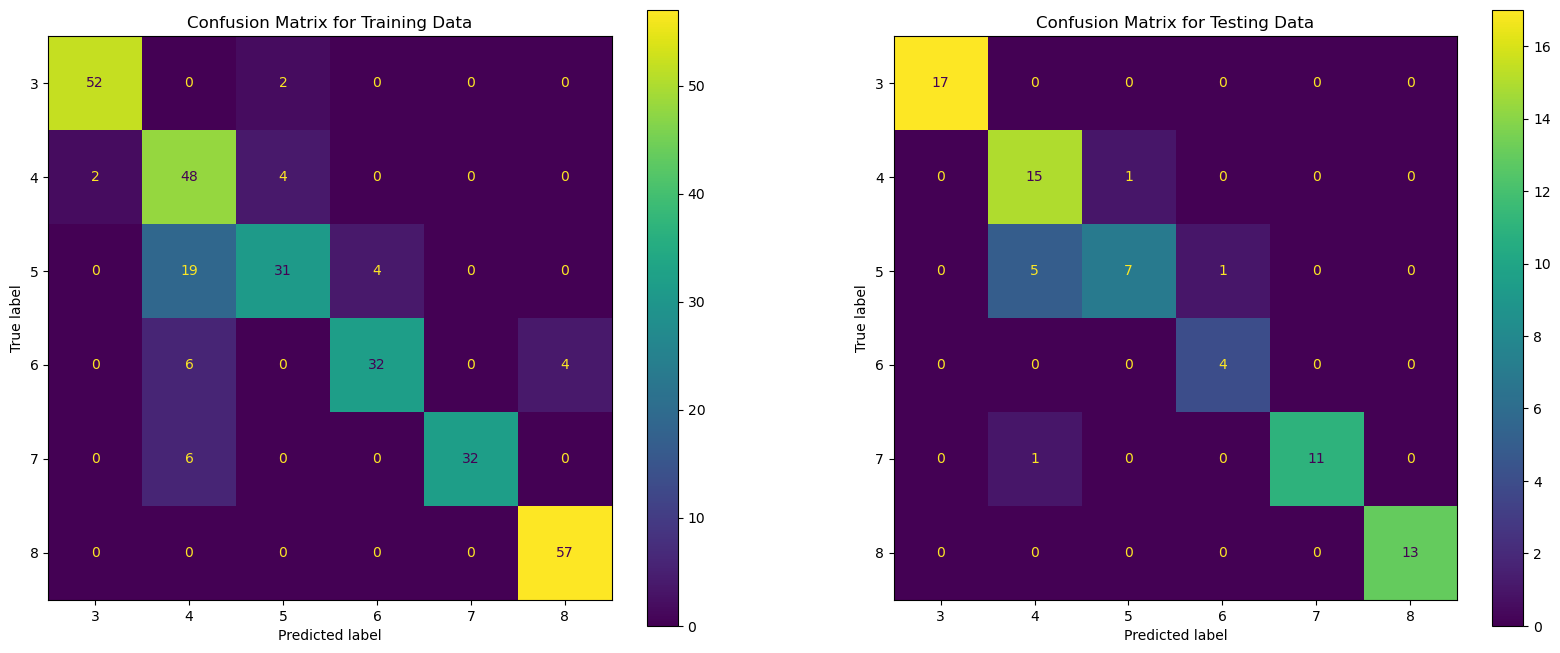

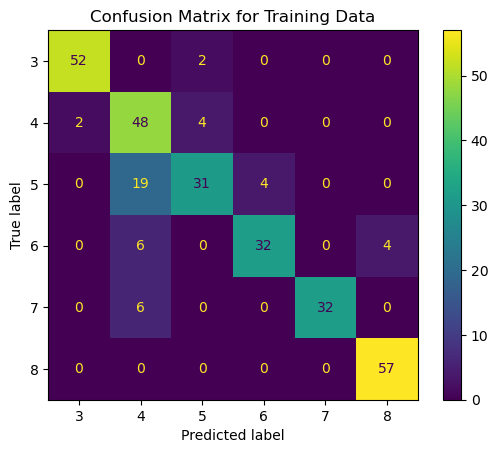

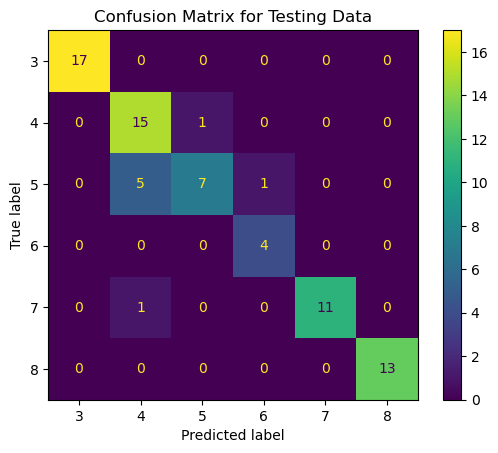

In [31]:
# logistic regression model

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# multinomial regression with cross validation for 10 folds
multi_logreg = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='lbfgs', max_iter=1000, refit=True)
multi_logreg.fit(X_train, y_train)

# use multinomial logistic regression to predict on train and test sets
y_trainPredmulti = multi_logreg.predict(X_train)
y_testPredmulti = multi_logreg.predict(X_test)

# display accuracy for train and test sets
print('Multinomial Logistic Regression Training Classification Report: \n',
      classification_report(y_train, y_trainPredmulti))
print(f'Accuracy: {accuracy_score(y_train, y_trainPredmulti)}\n')

print('Multinomial Logistic Regression Testing Classification Report: \n',
      classification_report(y_test, y_testPredmulti))
print(f'Accuracy: {accuracy_score(y_test, y_testPredmulti)}')

# create confusion matrix for train and test sets
conf_mat_multi_train = confusion_matrix(y_train, y_trainPredmulti, labels=y_labels)
conf_mat_multi_test = confusion_matrix(y_test, y_testPredmulti, labels=y_labels)

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredmulti, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredmulti, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

Naive Bayes Classification Train Report: 
               precision    recall  f1-score   support

           3       0.98      0.96      0.97        54
           4       0.59      0.23      0.33        57
           5       0.55      0.89      0.68        56
           6       0.88      0.74      0.80        38
           7       0.79      0.89      0.84        35
           8       0.95      1.00      0.98        59

    accuracy                           0.78       299
   macro avg       0.79      0.78      0.77       299
weighted avg       0.78      0.78      0.76       299

Train Accuracy: 0.7792642140468228

Naive Bayes Classification Test Report: 
               precision    recall  f1-score   support

           3       0.94      1.00      0.97        17
           4       0.67      0.31      0.42        13
           5       0.56      0.91      0.69        11
           6       0.88      0.88      0.88         8
           7       1.00      0.87      0.93        15
           

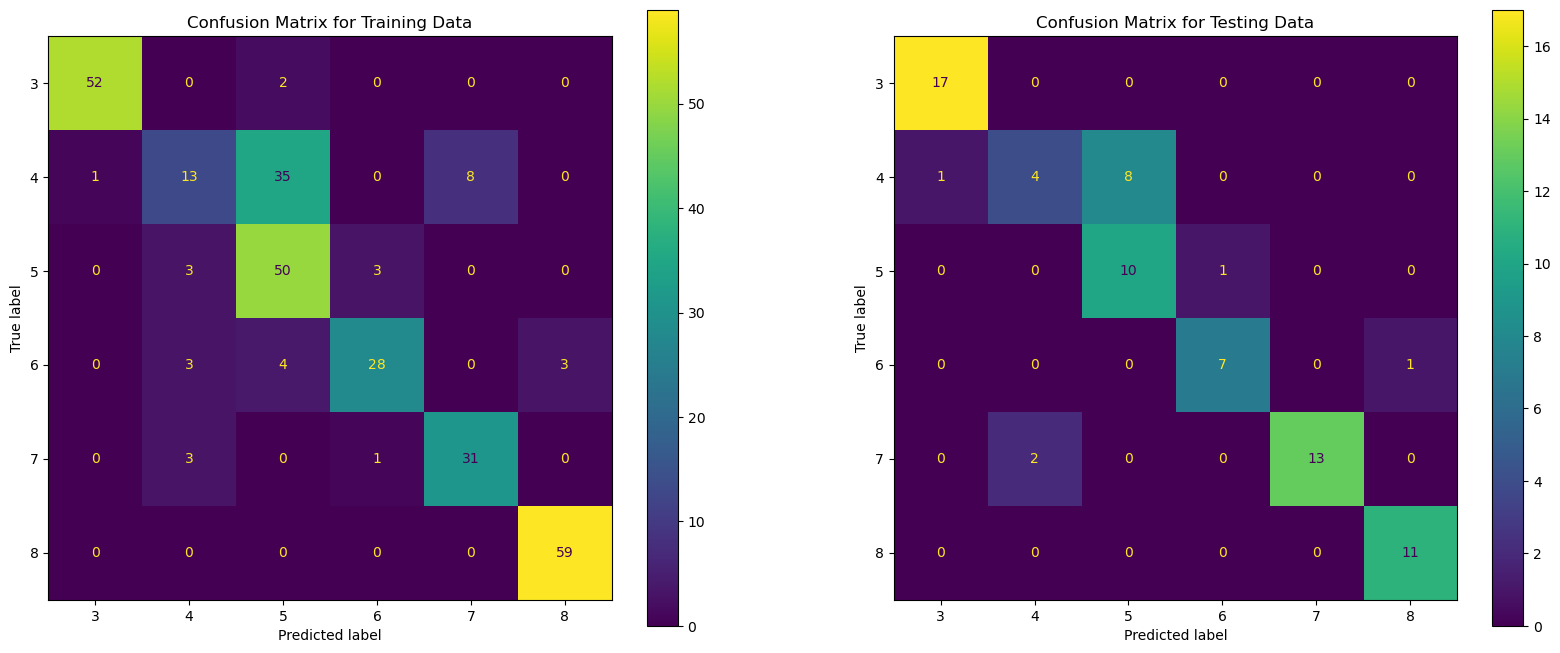

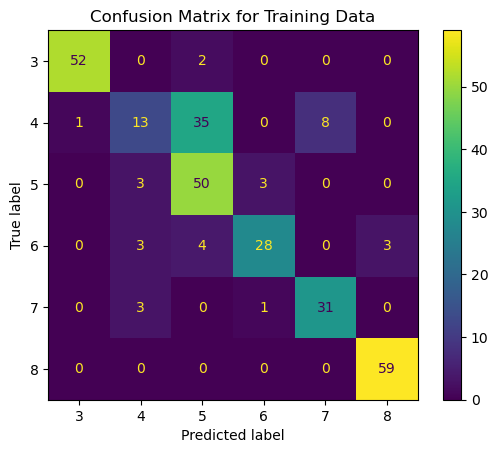

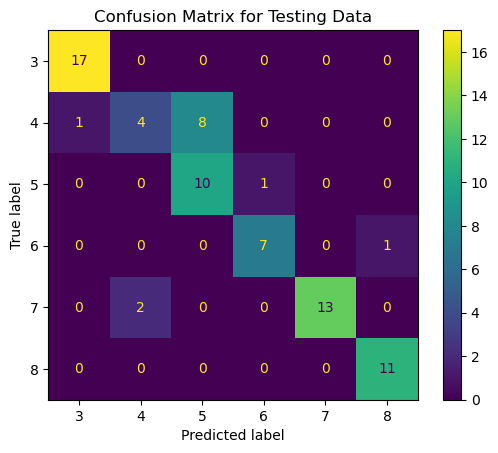

In [32]:
# Naive Bayes Classification

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# use Naive Bayes to predict on train and test sets
y_trainPredNB = gnb.predict(X_train)
y_testPredNB = gnb.predict(X_test)

# display accuracy for train and test sets
print('Naive Bayes Classification Train Report: \n',
      classification_report(y_train, y_trainPredNB))
print(f'Train Accuracy: {accuracy_score(y_train, y_trainPredNB)}\n')

print('Naive Bayes Classification Test Report: \n',
      classification_report(y_test, y_testPredNB))
print(f'Test Accuracy: {accuracy_score(y_test, y_testPredNB)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredNB, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredNB, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()

Support Vector Machine Classification Train Report: 
               precision    recall  f1-score   support

           3       0.97      0.97      0.97        59
           4       0.59      0.90      0.71        51
           5       0.85      0.55      0.67        53
           6       0.88      0.74      0.80        38
           7       1.00      0.86      0.92        42
           8       0.93      1.00      0.97        56

    accuracy                           0.84       299
   macro avg       0.87      0.83      0.84       299
weighted avg       0.87      0.84      0.84       299

Accuracy Train: 0.842809364548495

Support Vector Machine Classification Test Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        12
           4       0.71      0.89      0.79        19
           5       0.82      0.64      0.72        14
           6       1.00      0.88      0.93         8
           7       1.00      0.88      0.93 

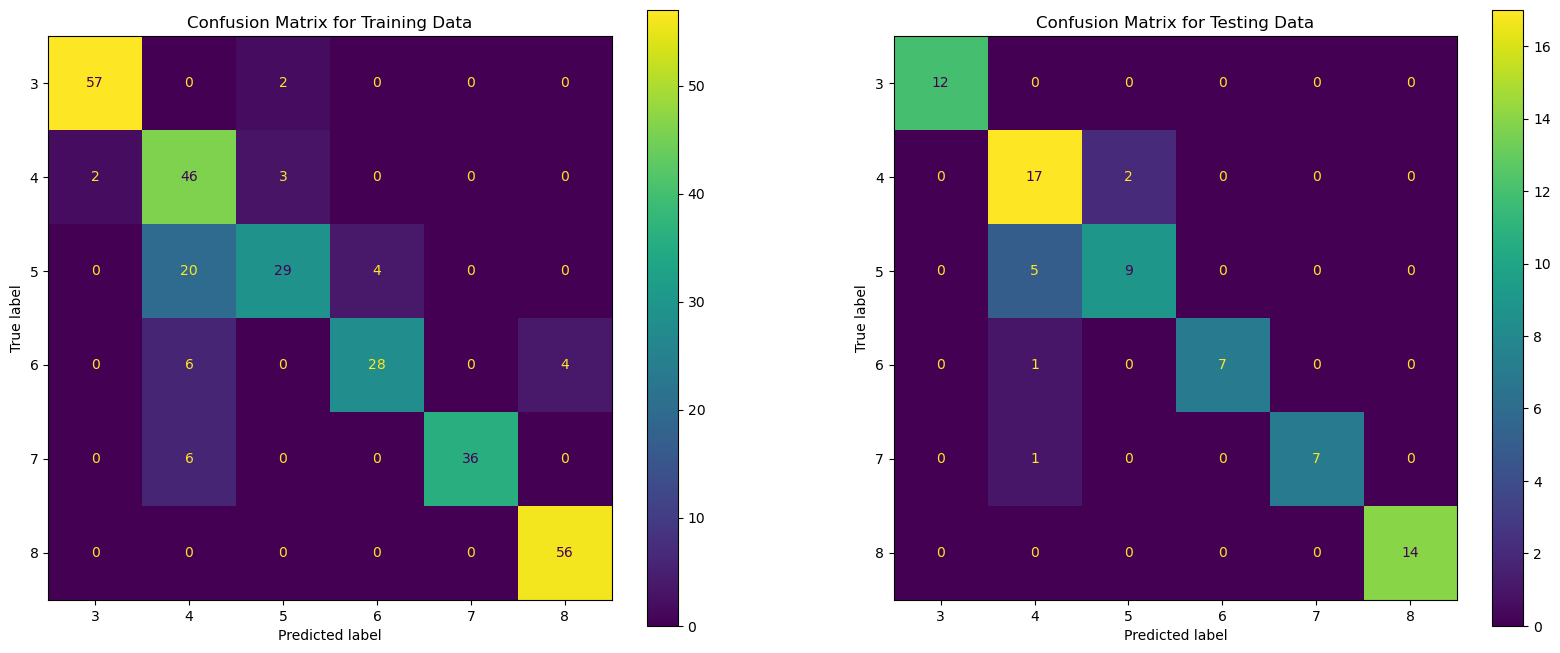

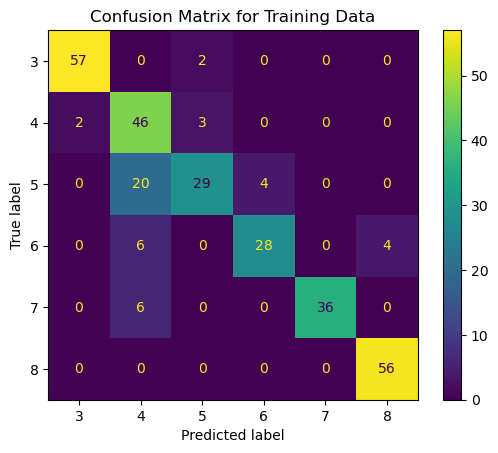

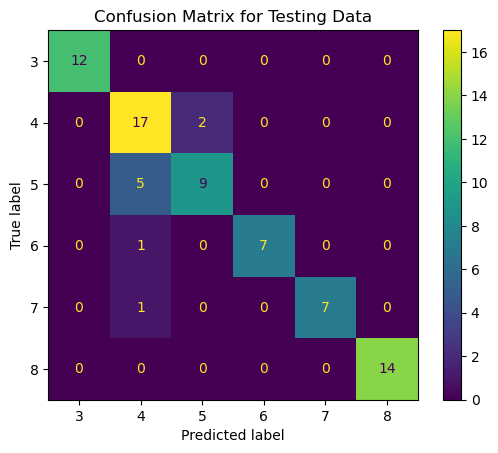

In [38]:
# creating a Support Vector Machine

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create Support Vector Machine model
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# use SVM to predict on train and test sets
y_trainPredSVM = svm.predict(X_train)
y_testPredSVM = svm.predict(X_test)

# display accuracy for train and test sets
print('Support Vector Machine Classification Train Report: \n',
      classification_report(y_train, y_trainPredSVM))
print(f'Accuracy Train: {accuracy_score(y_train, y_trainPredSVM)}\n')


print('Support Vector Machine Classification Test Report: \n',
      classification_report(y_test, y_testPredSVM))
print(f'Accuracy Test: {accuracy_score(y_test, y_testPredSVM)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredSVM, ax=axes[0])
disptrain.plot()
axes[0].set_title("Confusion Matrix for Training Data")
plt.title("Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredSVM, ax=axes[1])
disptest.plot()
axes[1].set_title("Confusion Matrix for Testing Data")
plt.title("Confusion Matrix for Testing Data")
plt.show()